In [2]:
#Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from datetime import datetime

plt.style.use('ggplot')

#What is stationarity

>A timeseries is said to be stationary if its statistical properties such as mean, variance and covarience remain constant over time. Thus, time series with trends, or with seasonality, are not stationary.

#Why is it important?
1. An underlying assumption in timeseries analysis is that if a timeseries exhibits a particular behaviour over time, there is a very high likelyhood that it will follow the same in the future too.

2. Most of the timeseries models assume that given timeseries is stationary.

3. Most time series forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors. Undelying assumption in Linear regression is that predictors (X variables) are not correlated (multicollinearity). Therefore, stationarising a timeseries solves collinearity problem, since it removes any persistent autocorrelation (more about this in the next section).

#Identifying stationary timeseries

Stationarity is defined using very strict criterion. However, in practice a timeseries is said to be stationary if it has constant statistical properties such as mean, variance and autocovariance over time.

1. The mean of a time series should be a constant. The series on the right has trend (increasing mean), so it is non-stationary.

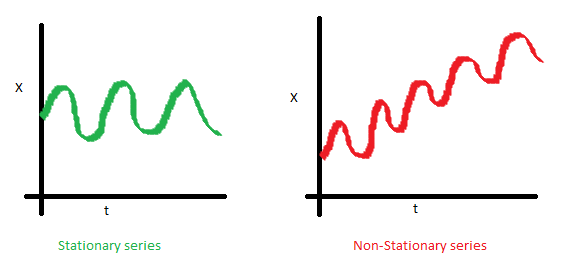

2. The variance of the series should be constant (homoscedasticity). The series on the right has increasing varience, making it non-sationary.

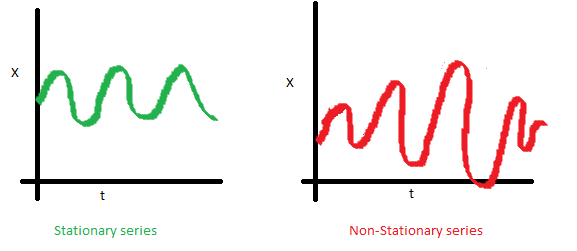

3. Autocovariance of timeseries (i.e., autocorrelation between *i* th term and the *(i + m)* th term) should be constant. The series on the right has decreasing spread with increasing time, so the covariance is not constant with time making it non-stationary.

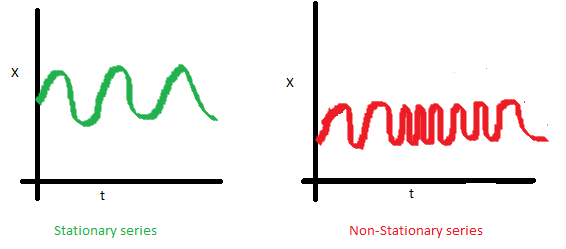

#Can stationarity be identified by visual inspection?

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0, flags=flags)


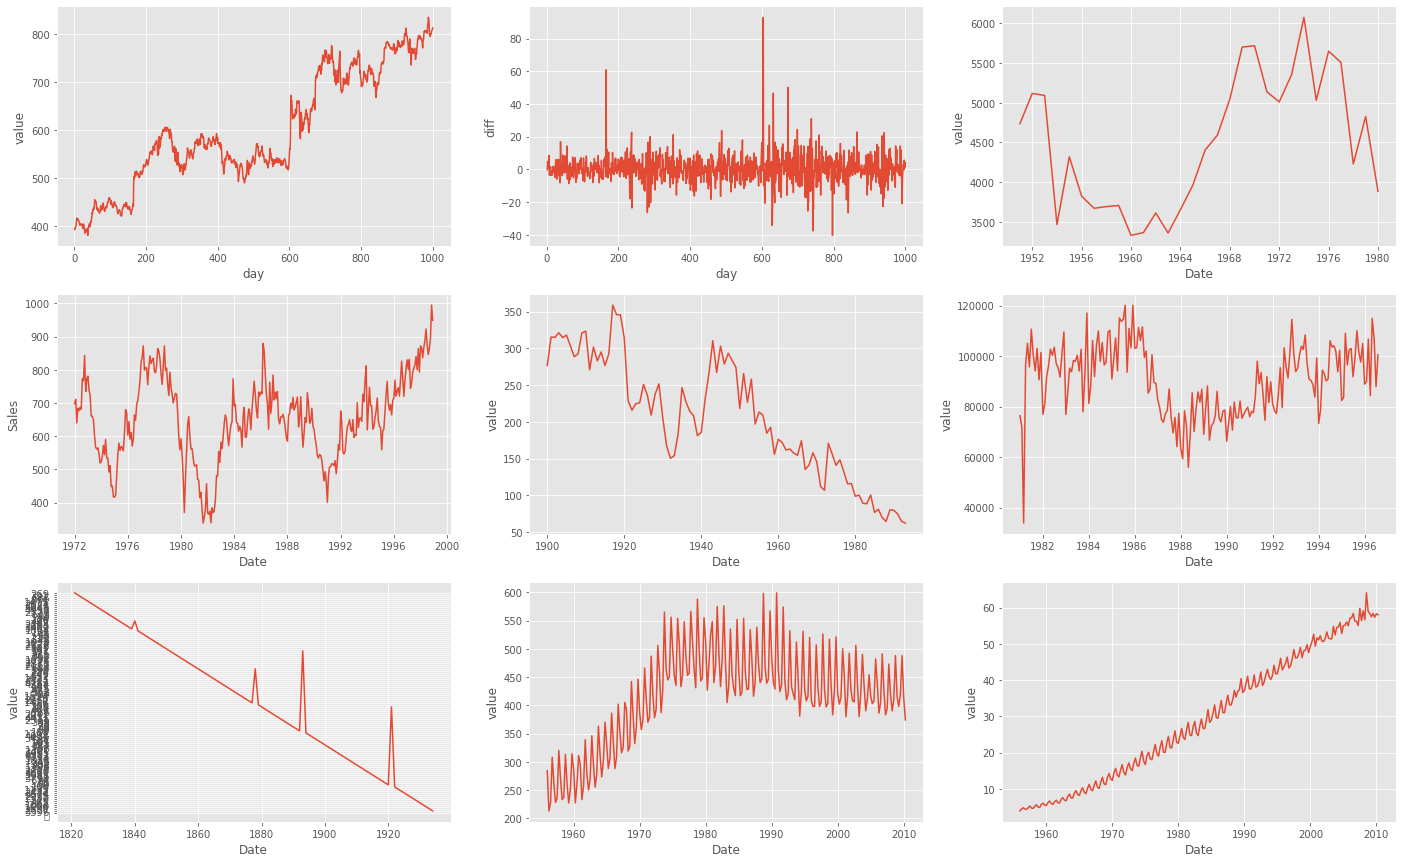

In [19]:
dt_parser = lambda x: pd.to_datetime(x, format='%d/%m/%Y', errors='coerce')
df1 = pd.read_csv('https://raw.githubusercontent.com/tdevip/TSA/master/data-raw/goog.csv', index_col='day')
df1['value1'] = df1.shift(1)
df1['diff'] = df1.value - df1.value1;
df3 = pd.read_csv('https://raw.githubusercontent.com/tdevip/TSA/master/data-raw/strikes.csv', parse_dates=['Date'], index_col='Date')
df4 = pd.read_csv('https://raw.githubusercontent.com/tdevip/TSA/master/data-raw/HSN1F.csv', parse_dates=['Date'], index_col='Date', date_parser=dt_parser)
df5 = pd.read_csv('https://raw.githubusercontent.com/tdevip/TSA/master/data-raw/eggs.csv', parse_dates=['Date'], index_col='Date')
df6 = pd.read_csv('https://raw.githubusercontent.com/tdevip/TSA/master/data-raw/pigs.csv', parse_dates=['Date'], index_col='Date', date_parser=dt_parser)
df7 = pd.read_csv('https://raw.githubusercontent.com/tdevip/TSA/master/data-raw/LYNX.csv', parse_dates=['Date'], index_col='Date')
df8 = pd.read_csv('https://raw.githubusercontent.com/tdevip/TSA/master/data-raw/ausbeer.csv', parse_dates=['Date'], index_col='Date', date_parser=dt_parser)
df9 = pd.read_csv('https://raw.githubusercontent.com/tdevip/TSA/master/data-raw/qauselec.csv', parse_dates=['Date'], index_col='Date', date_parser=dt_parser)

fig, ax = plt.subplots(3, 3, figsize=(24,15))
sn.lineplot(x='day', y='value', data=df1, ax=ax[0,0])
sn.lineplot(x='day', y='diff', data=df1, ax=ax[0,1])
sn.lineplot(x='Date', y='value', data=df3, ax=ax[0,2])
sn.lineplot(x='Date', y='Sales', data=df4, ax=ax[1,0])
sn.lineplot(x='Date', y='value', data=df5, ax=ax[1,1])
sn.lineplot(x='Date', y='value', data=df6, ax=ax[1,2])
sn.lineplot(x='Date', y='value', data=df7, ax=ax[2,0])
sn.lineplot(x='Date', y='value', data=df8, ax=ax[2,1])
sn.lineplot(x='Date', y='value', data=df9, ax=ax[2,2]);

In [20]:
df7.head()

,value
Date,
1821-01-01,269
1822-01-01,321
1823-01-01,585
1824-01-01,871
1825-01-01,1475


#Statistical tests for stationarity

#How to make a non-stationary timeseries stationary
More often than not, time series data are “non-stationary”. Some cases can be confusing — a time series with cyclic behaviour (but with no trend or seasonality) is stationary. Similarly, a white noise series is stationary. 